In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv("/content/archive (2).zip")
train_data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **HANDLING MISSING VALUES AND PREPROCESSING DATA**

In [ ]:
#TARGET DATA SURVIVED
target = train_data["Survived"]
#SELECTING NUMERIC VALUES
numeric_features = train_data.select_dtypes(include=['number'])
features_numeric = train_data[numeric_features.columns]
#IMPUTING MISSING VALUES WITH MEAN
imputer_numeric = SimpleImputer(strategy="mean")
features_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(features_numeric), columns=features_numeric.columns)

**ENCODING CATEGORICAL DATA AND IMPUTING MISSING VALUES WITH DUMMIES**

In [ ]:
categorical_features = train_data.select_dtypes(exclude=['number'])
imputer_categorical = SimpleImputer(strategy="most_frequent")
features_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(categorical_features), columns=categorical_features.columns)
features_imputed = pd.concat([features_imputed_numeric, features_imputed_categorical], axis=1)
features_encoded = pd.get_dummies(features_imputed)

CREATING RANDOM MODEL CLASSIFIER

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(features_encoded, target, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
joblib.dump(model, 'model_joblib.pkh')

['model_joblib.pkh']

TEST DATA

In [ ]:
test_data = pd.read_csv("/content/archive (2).zip")
test_target = test_data["Survived"]
#NUMERIC DATA
numfea_test = test_data.select_dtypes(include=['number'])
features_numeric_test = test_data[numfea_test.columns]
features_imputed_numeric_test = pd.DataFrame(imputer_numeric.transform(features_numeric_test), columns=features_numeric_test.columns)
#CATEGORICAL DATA
categoricalfea_test = test_data.select_dtypes(exclude=['number'])
features_imputed_categorical_test = pd.DataFrame(imputer_categorical.transform(categoricalfea_test), columns=categoricalfea_test.columns)
features_imputed_test = pd.concat([features_imputed_numeric_test, features_imputed_categorical_test], axis=1)
features_encoded_test = pd.get_dummies(features_imputed_test)


**LOADING** **MODEL** **AND** **MAKING** **PREDICTIONS**

0:SURVIVED

1:NOT SURVIVED

In [ ]:
loaded_model = joblib.load('model_joblib.pkh')
predictions = loaded_model.predict(features_encoded_test)
if 'Survived' in test_data.columns:
    accuracy = accuracy_score(test_target, predictions)
    print(f"Accuracy on the test set: {accuracy}")
print(predictions)
predictions = loaded_model.predict(features_encoded_test)
if 'Survived' in test_data.columns:
    accuracy = accuracy_score(test_target, predictions)
    print(f"Accuracy on the test set: {accuracy}")

formatted_predictions = ["Survived" if pred == 0 else "Not survived" for pred in predictions]
print(formatted_predictions)

Accuracy on the test set: 1.0
[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
Accuracy on the test set: 1.0
['Survived', 'Not survived', 'Survived', 'Survived', 'Not survived', 'Survived', 'Not survi

**PREDICTING** **WHICH** **CLASS** **PASSENGERS** **ARE** **MORE** **LIKELY** **TO** **SURVIVE**

In [ ]:
test_data['Predicted_Survived'] = predictions
predicted_survival_by_class = test_data.groupby('Pclass')['Predicted_Survived'].mean()
print(predicted_survival_by_class)

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Predicted_Survived, dtype: float64


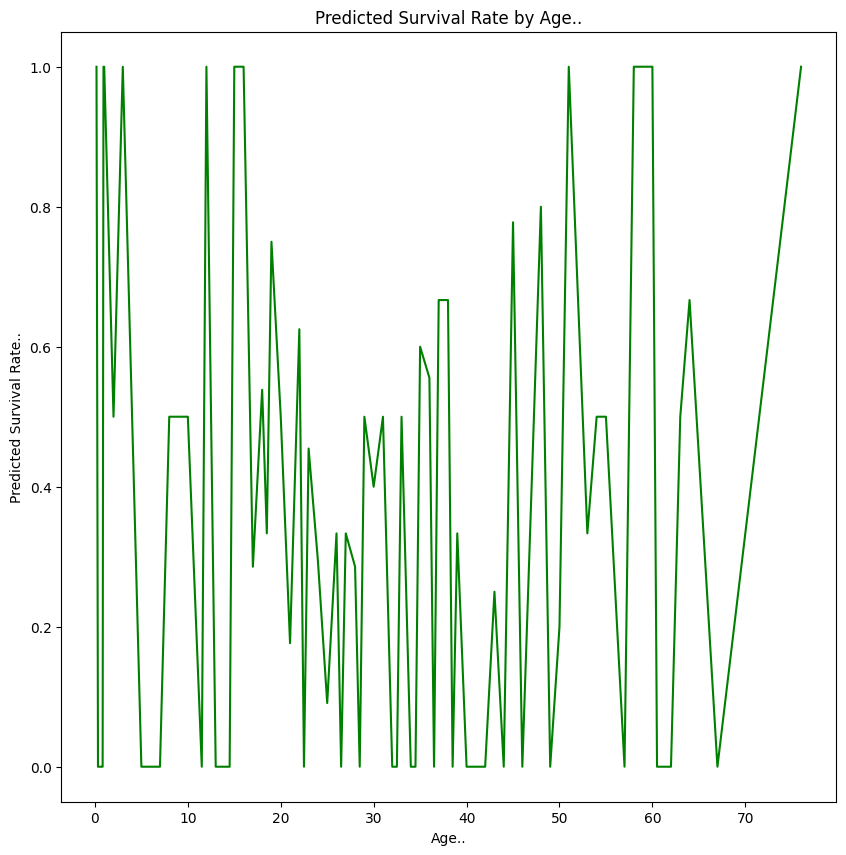

In [ ]:
predicted_survival_by_age = test_data.groupby('Age')['Predicted_Survived'].mean()
plt.figure(figsize=(10, 10))
sns.lineplot(x=predicted_survival_by_age.index, y=predicted_survival_by_age.values, color='green')
plt.title('Predicted Survival Rate by Age..')
plt.xlabel('Age..')
plt.ylabel('Predicted Survival Rate..')
plt.show()

**VISUALIZING** **RESULTS**

BAR CHART

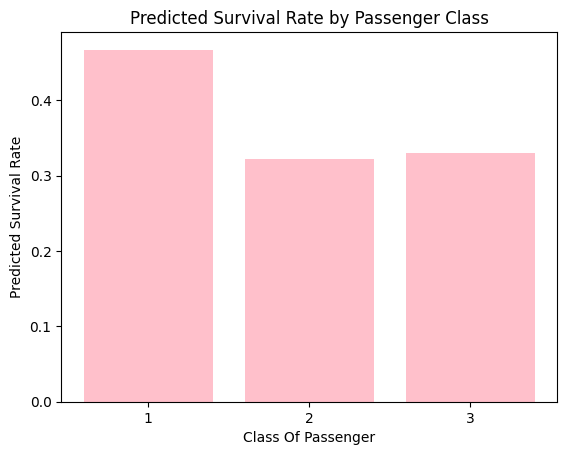

In [ ]:
#visualizing results
predicted_survival_by_class = test_data.groupby('Pclass')['Predicted_Survived'].mean()
plt.bar(predicted_survival_by_class.index, predicted_survival_by_class.values, color='pink')
plt.xlabel('Class Of Passenger')
plt.ylabel('Predicted Survival Rate')
plt.title('Predicted Survival Rate by Passenger Class')
plt.xticks(predicted_survival_by_class.index)
plt.show()


**SCATTER** **PLOT**

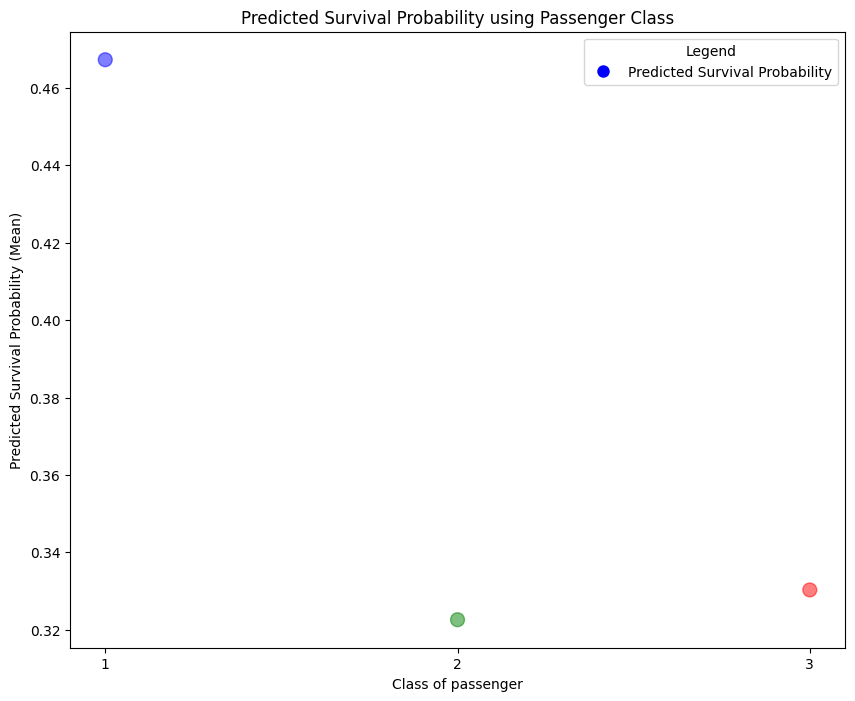

In [ ]:
test_data['Pclass'] = test_data['Pclass'].astype(str)
plt.figure(figsize=(10, 8))
predicted_survival_by_class = test_data.groupby('Pclass')['Predicted_Survived'].mean()
class_labels = ['1', '2', '3']
class_colors = {'1': 'blue', '2': 'green', '3': 'red'}
colors = [class_colors[pclass] for pclass in predicted_survival_by_class.index]
plt.scatter(predicted_survival_by_class.index, predicted_survival_by_class, c=colors, s=100, alpha=0.5, label='Predicted Survival Probability')
plt.title('Predicted Survival Probability using Passenger Class')
plt.xlabel('Class of passenger')
plt.ylabel('Predicted Survival Probability (Mean)')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Predicted Survival Probability', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements, title='Legend')
plt.show()


In [ ]:

passenger_classes = test_data['Pclass'].unique()


**LOLLIPOP CHART**

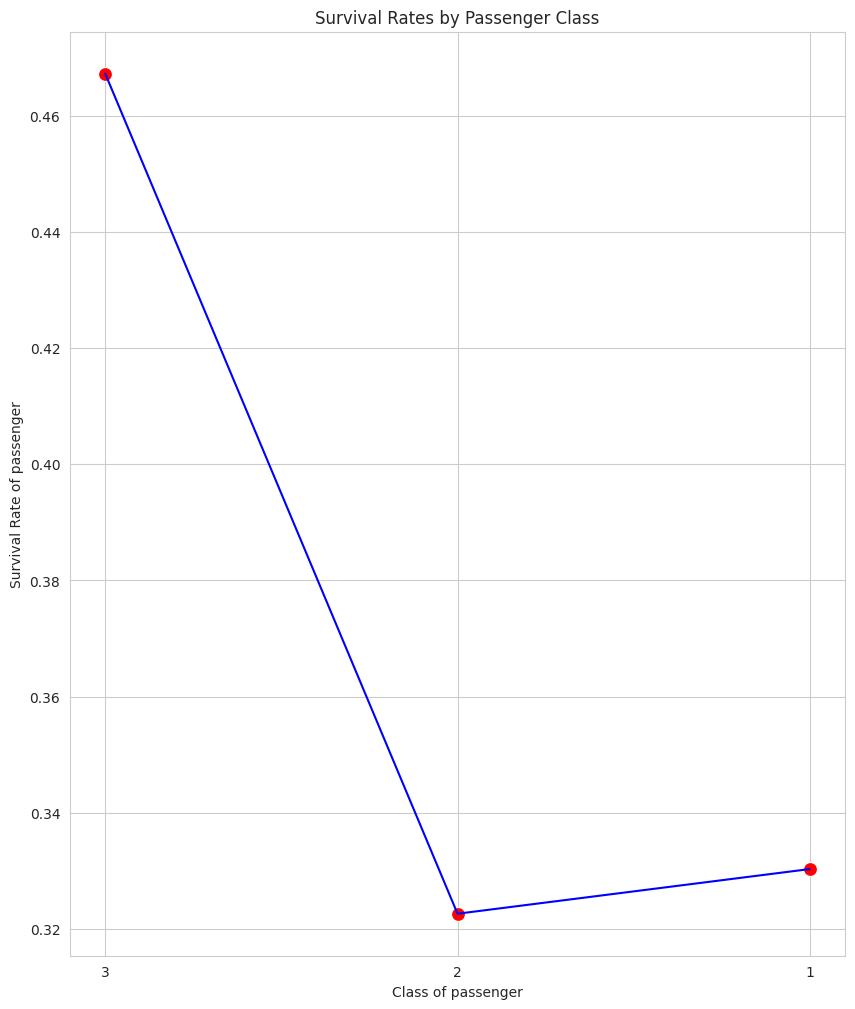

In [ ]:
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.scatterplot(x=passenger_classes, y=predicted_survival_by_class, s=100, color='red', marker='o')
sns.lineplot(x=passenger_classes, y=predicted_survival_by_class, color='blue')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Class of passenger')
plt.ylabel('Survival Rate of passenger')
plt.show()

**BOXPLOT**

<ipython-input-27-e4c998449162>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Predicted_Survived', data=test_data, palette=['black', 'violet', 'green'])


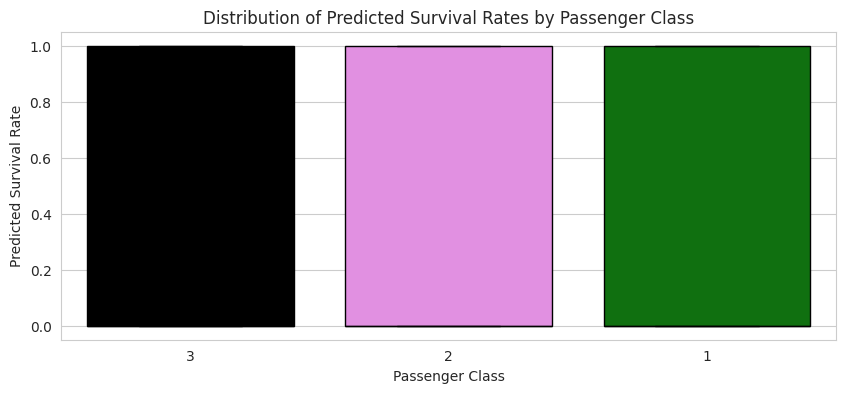

In [ ]:
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.boxplot(x='Pclass', y='Predicted_Survived', data=test_data, palette=['black', 'violet', 'green'])
plt.title('Distribution of Predicted Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Predicted Survival Rate')
plt.show()


**POLAR CHART**

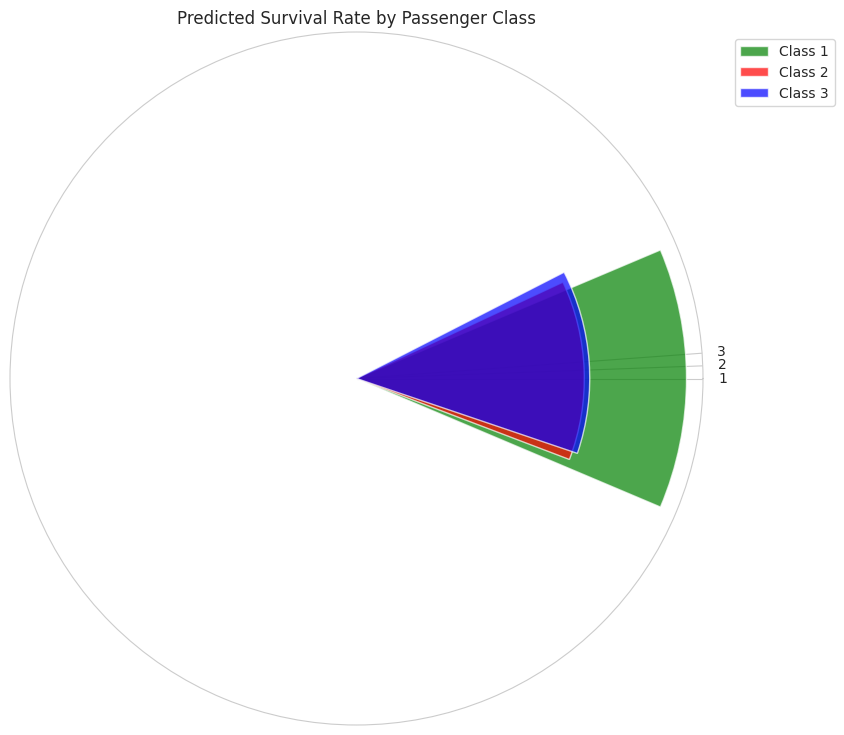

In [ ]:
import numpy as np
predicted_survival_by_class = test_data.groupby('Pclass')['Predicted_Survived'].mean()
theta = np.linspace(0, 2*np.pi, len(predicted_survival_by_class), endpoint=False)
values = predicted_survival_by_class.values
theta = np.radians(theta)
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw=dict(polar=True))
bars = ax.bar(theta, values, color=['green', 'red', 'blue'], alpha=0.7)
ax.set_xticks(theta)
ax.set_xticklabels(predicted_survival_by_class.index)
ax.set_yticklabels([])
ax.set_yticks([])
legend_labels = ['Class 1', 'Class 2', 'Class 3']
ax.legend(bars, legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Predicted Survival Rate by Passenger Class")
plt.show()


**PIE CHART**

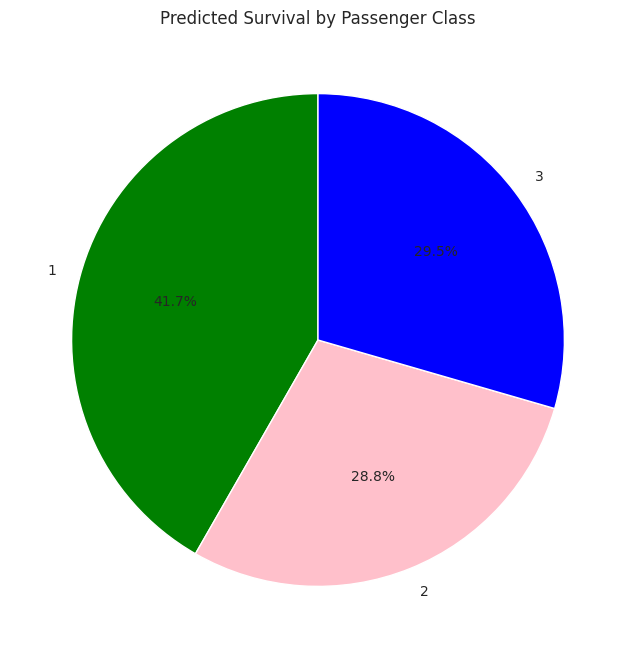

In [ ]:
predicted_survival_by_class = test_data.groupby('Pclass')['Predicted_Survived'].mean()
labels = predicted_survival_by_class.index
colors = ['green', 'pink', 'blue']
plt.figure(figsize=(10, 8))
plt.pie(predicted_survival_by_class, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Predicted Survival by Passenger Class')
plt.show()
